----
# Laboratorium 8 - Przestrzeń zmiennych stanu
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów Wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej 

----
## 0. Zagadnienia do opanowania przed zajęciami
----
- odpowiedź skokowa 
- równania stanu
- stabilność Lapunowa

Funkcje z biblioteki *scipy.signal* potrzebne do zrealizowania ćwiczenia:  
`scipy.signal.freqresp`, `scipy.signal.signal.tf2ss`,  `scipy.signal.impulse`

Dokumentacja i opisy poszczególnych funkcji *scipy.signal*:  
https://docs.scipy.org/doc/scipy/reference/signal.html    



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import sympy
poles_figsize  = (8 , 8 )
default_figsize= (14, 10)

----
## 1.	Wyznaczyć transmitancję układu z rysunku poniżej
Dokonaj uproszczenia z wykorzystaniem funkcji `sympy.cancel`. Zwróć uwagę na różnicę między zastosowaniem funkcji `sympy.simplify` a `sympy.cancel` 

<br>
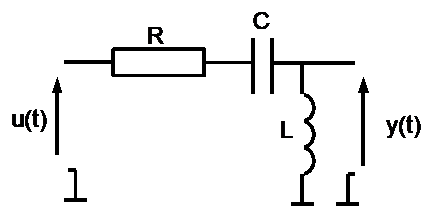



In [2]:
#declare symbolic variable s (complex), R,L,C
s = sympy.Symbol('s', real = 'False', nonzero = 'True')
R = sympy.Symbol('R', real = 'True' , nonzero = 'True')
C = sympy.Symbol('C', real = 'True' , nonzero = 'True')
L = sympy.Symbol('L', real = 'True' , nonzero = 'True')

H2 = (s*L)/(R+s*L+(1/(s*C)))
display(sympy.simplify(H2))
display(sympy.cancel  (H2))

C*L*s**2/(C*s*(L*s + R) + 1)

C*L*s**2/(C*L*s**2 + C*R*s + 1)

---- 
## 2.	Wyznaczyć analitycznie macierze stanu A, B, C i D dla tego układu.
---- 

<br>
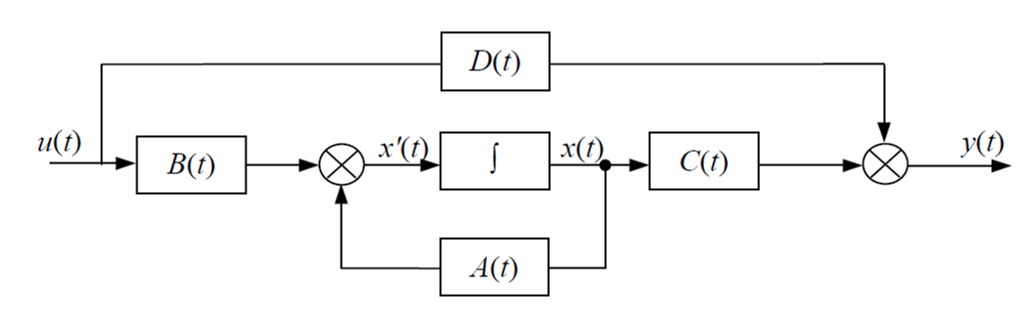




<br>
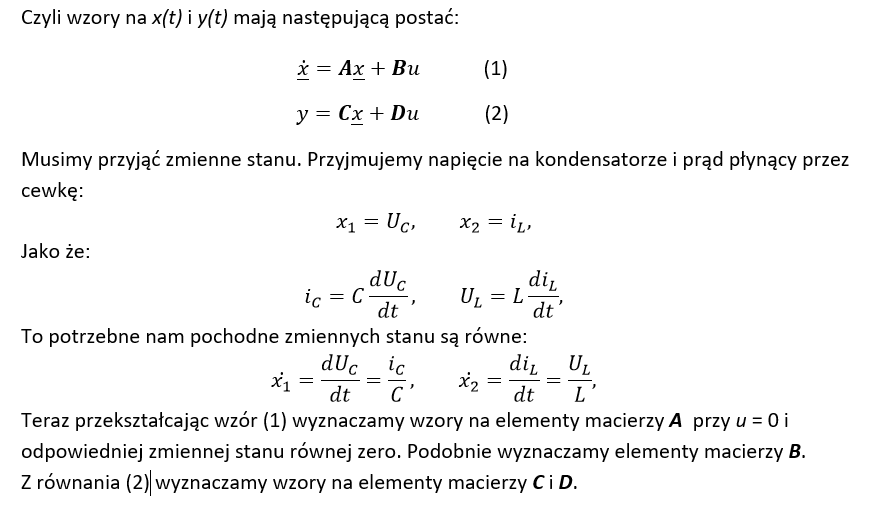



<br>
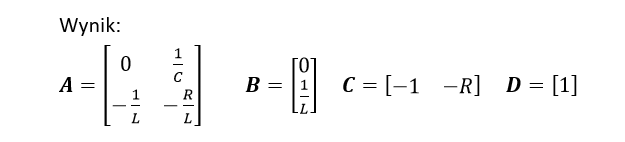

---- 
## 3.	Sprawdzić poprawność macierzy stanu obliczając transmitancję układu na podstawie macierzy i porównując ją do transmitancji wyznaczonej w punkcie pierwszym 
---- 

Wyznaczyć transmitancję ze wzoru: $$ H(s) = { C (sI-A)^{-1}  B + D}   $$

Podpowiedź:  
Zapoznaj się z https://docs.sympy.org/latest/tutorial/matrices.html oraz https://docs.sympy.org/latest/modules/matrices/expressions.html

In [3]:

s     = sympy.symbols('s'      , cpmplex = True)
R,L,C = sympy.symbols('R, L, C', real    = True, positive = True)

# wzór ogólny
a=sympy.Matrix([[0, 1/C], [-1/L, -R/L]])
b=sympy.Matrix([[0], [1/L]])
c=sympy.Matrix([[-1, -R]])
d=sympy.Matrix([[1]])
I=sympy.eye(2)

H=c*(s*I-a).inv()*b+d
display(sympy.simplify(H))

# dla podstawionych wartości R, L, C
R, L, C = 1, 1, 1

a=sympy.Matrix([[0, 1/C], [-1/L, -R/L]])
b=sympy.Matrix([[0], [1/L]])
c=sympy.Matrix([[-1, -R]])
d=sympy.Matrix([[1]])
I=sympy.eye(2)

H=c*(s*I-a).inv()*b+d
display(sympy.simplify(H))

Matrix([[C*L*s**2/(C*L*s**2 + C*R*s + 1)]])

Matrix([[1.0*s**2/(s**2 + s + 1)]])

---- 
## 4.	Mając wyznaczone macierze stanu zbadać stabilność w sensie Lapunowa
---- 

Warunek na stabilność w sensie Lapunowa: Wartości własne macierzy stanu A leżą w lewej otwartej półpłaszczyźnie, zaś pojedyncze wartości własne w lewej domkniętej półpłaszczyźnie.
Ta definicja trochę różni się od stabilności w sensie BIBO. Mianowicie w przypadku stabilności w sensie BIBO sprawdzamy czy bieguny transmitancji leżą w lewej otwartej półpłaszczyźnie a nie wartości własne macierzy stanu A. Ale bieguny zawierają się w zbiorze wartości własnych – wiec jeżeli układ jest stabilny w sensie Lapunowa to jest też stabilny w sensie BIBO. W druga stronę to nie działa ponieważ mogą istnieć wartości własne macierzy stanu które nie są biegunami transmitancji. Czyli stabilność w sensie Lapunowa jest trudniejsza do spełnienia, choć jednocześnie dopuszcza pojedyncze wartości własne na osi rzeczywistej. W przypadku rozpatrywanego zadania wszystkie wartości własne macierzy A są jednocześnie biegunami transmitancji.

Podpowiedź:  
użyj funkcji `eigenvals` https://docs.sympy.org/latest/modules/matrices/matrices.html?highlight=eigenvals#sympy.matrices.matrices.MatrixEigen.eigenvals





In [4]:
R,L,C = sympy.symbols('R, L, C', real = True, positive = True)
a=sympy.Matrix([[0, 1/C], [-1/L, -R/L]])

print('Wartości własne:')
display(a.eigenvals(multiple=True))

# przy R,L,C=1
R, L, C = 1, 1, 1
a=sympy.Matrix([[0, 1/C], [-1/L, -R/L]])


print('Wartości własne dla R=L=C=1:')
display(a.eigenvals(multiple=True))

print('Bieguny transmitancji R=L=C=1:')
den = np.poly1d([1, 1, 1])
print(np.roots(den))

Wartości własne:


[-R/(2*L) - sqrt(C*R**2 - 4*L)/(2*sqrt(C)*L),
 -R/(2*L) + sqrt(C*R**2 - 4*L)/(2*sqrt(C)*L)]

Wartości własne dla R=L=C=1:


[-0.5 - 0.866025403784439*I, -0.5 + 0.866025403784439*I]

Bieguny transmitancji R=L=C=1:
[-0.5+0.8660254j -0.5-0.8660254j]


---- 
## 5.	Obejrzeć przebieg zmiennych stanu i odpowiedź skokową układu dla R=1, C=1, L=1.
---- 






C:\Users\pient\AppData\Local\Temp\ipykernel_11228\3787867032.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


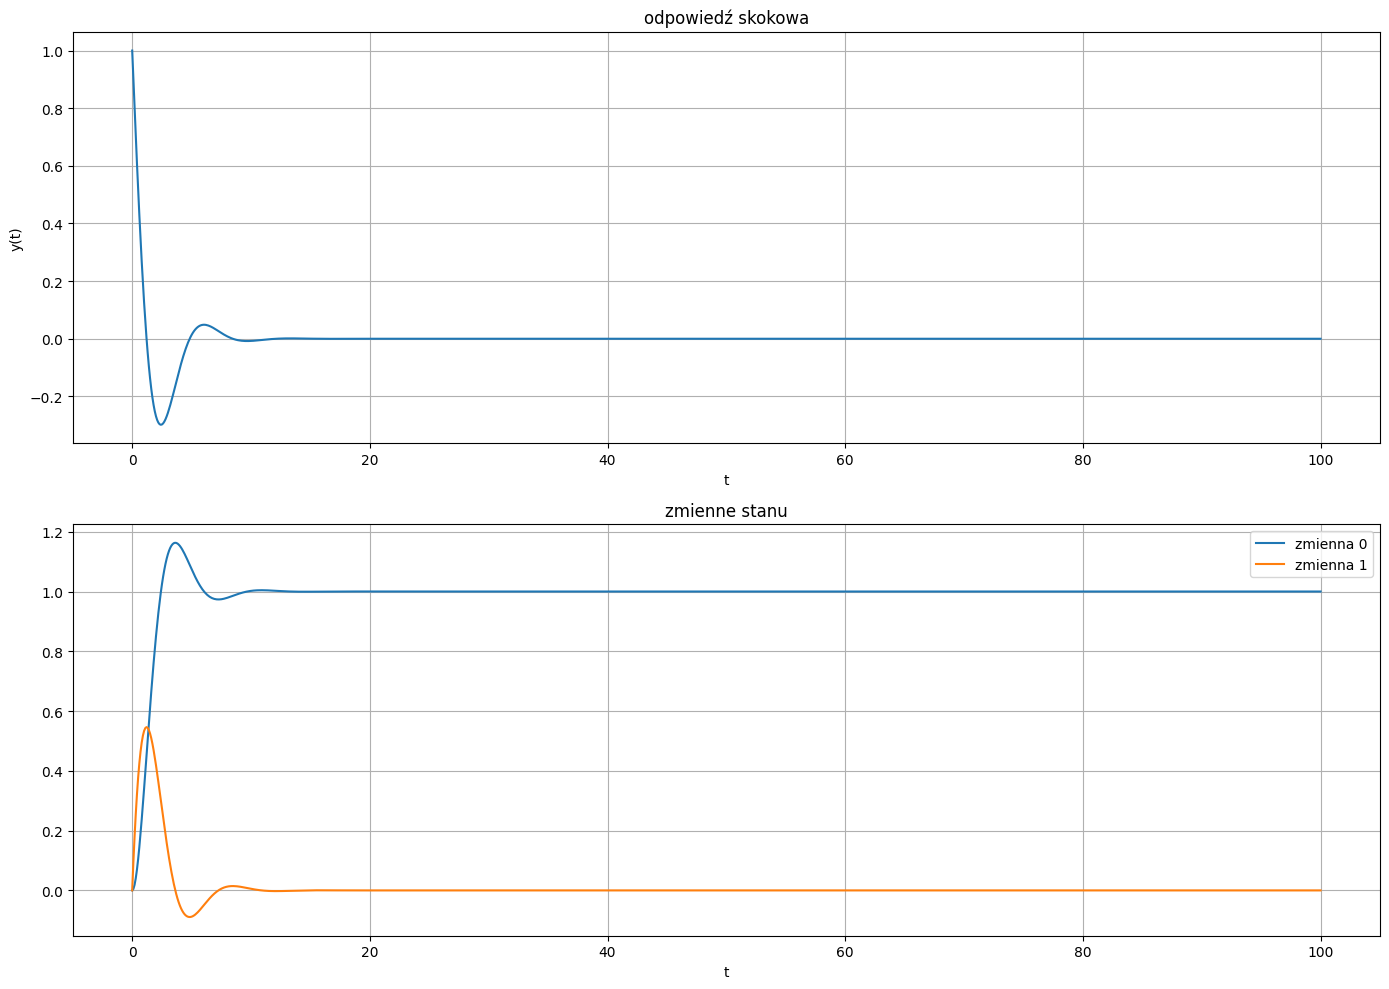

In [5]:
xR = 1
xL = 1
xC = 1
 
#przyjete zmienne:
# 1 - napiecie na kondesatorze C
# 2 - prad przez cewke L
 
# macierze stanu
A = np.asarray( a )
B = np.asarray( b )
C = np.asarray( c )
D = np.asarray( d )

systemik = scipy.signal.StateSpace(A, B, C, D)

t = np.linspace(0, 100, 1000) # initialize time
U = np.ones((t.shape[0], 1)) # skok jednostkowy
# simulate the system
_, SystemResponse, StateVariables = scipy.signal.lsim(systemik, U, t)

fig, axs = plt.subplots(2, 1, figsize=default_figsize)
axs[0].plot(t, SystemResponse)
axs[0].set_title("odpowiedź skokowa")
axs[0].set_xlabel("t")
axs[0].set_ylabel("y(t)")
axs[0].grid()
axs[1].plot(t, StateVariables[:,0], label="zmienna 0")
axs[1].plot(t, StateVariables[:,1], label="zmienna 1")
axs[1].set_title("zmienne stanu")
axs[1].set_xlabel("t")
axs[1].grid()
axs[1].legend()
fig.tight_layout()
fig.show()

---- 
## 6.	Powtórzyć badanie stabilności oraz zaobserwować odpowiedzi skokowe i zmienne stanu dla tak dobranych wartości rezystancji, aby uzyskać przypadki:
---- 


a.	przetłumiony (transmitancja ma 2 rzeczywiste bieguny, czyli delta mianownika transmitancji >0), R>2. Dla R =10:

b.	krytyczny (transmitancja ma biegun podwójny, delta mianownika = 0), R=2:

c.	niedotłumiony (transmitancja ma 2 zespolone i sprzężone bieguny, czyli delta mianownika transmitancji <0). R<2. Dla R=1:

W każdym przypadku określić czas narastania, tzn. czas, po którym stan zmiennej różni się od stanu ustalonego nie więcej niż 5% (dla przypadku oscylacyjnego posłużyć się obwiednią) .


In [6]:
Systems = { "przetłumiony"           : { "R" : 10  , "L" : 1, "C" : 1 },
            "aperiodyczny krytyczny" : { "R" : 2   , "L" : 1, "C" : 1 },
            "niedotłumiony"          : { "R" : 1   , "L" : 1, "C" : 1 }, }

C:\Users\pient\AppData\Local\Temp\ipykernel_11228\1558844505.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figS.show()
C:\Users\pient\AppData\Local\Temp\ipykernel_11228\1558844505.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figP.show()


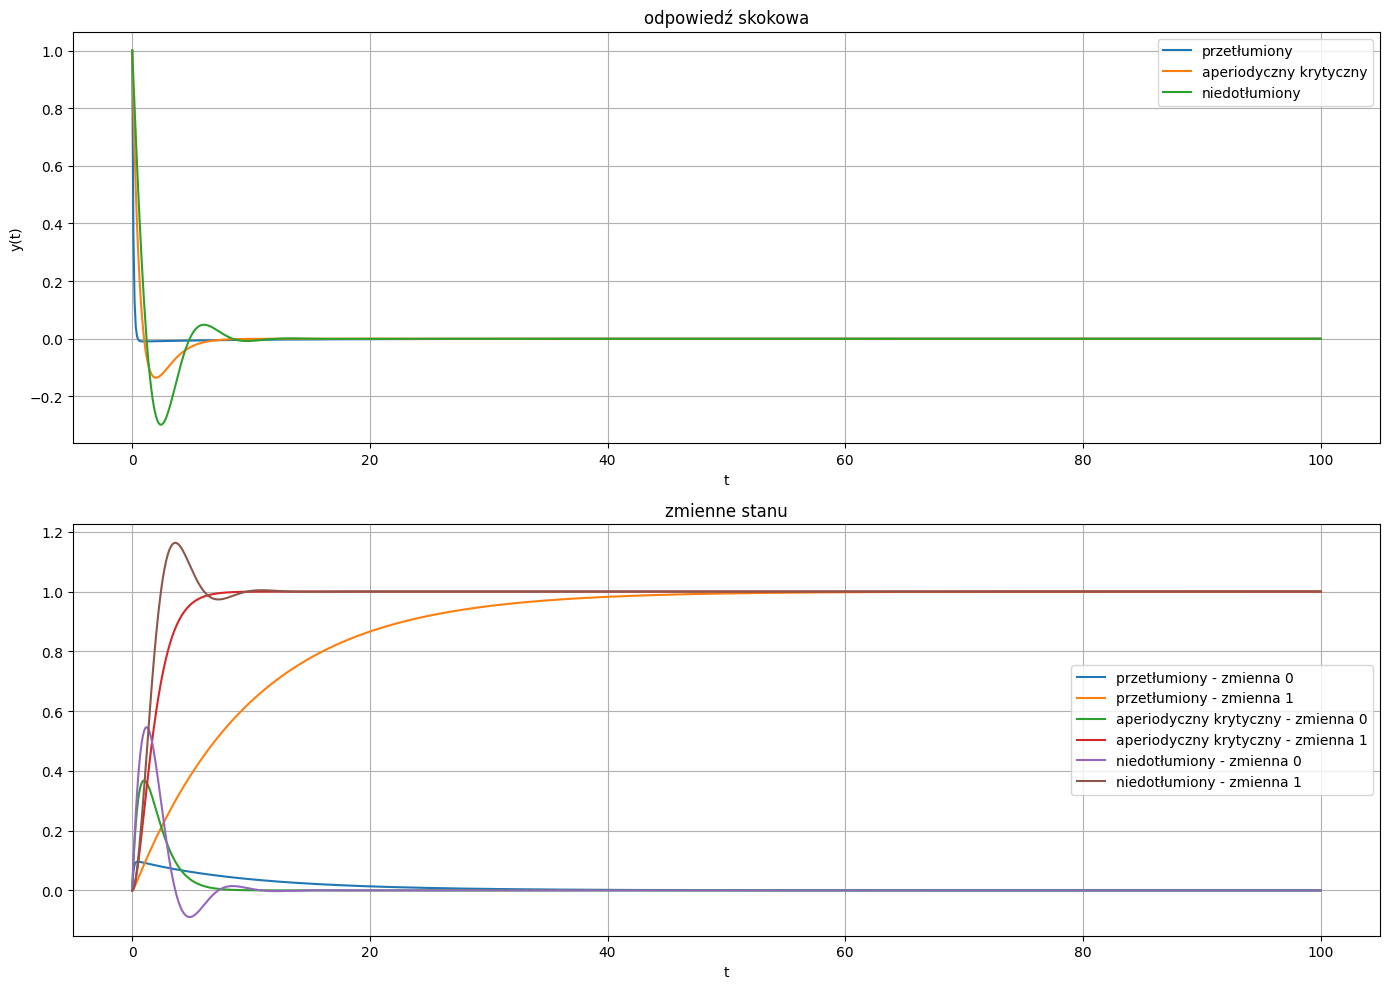

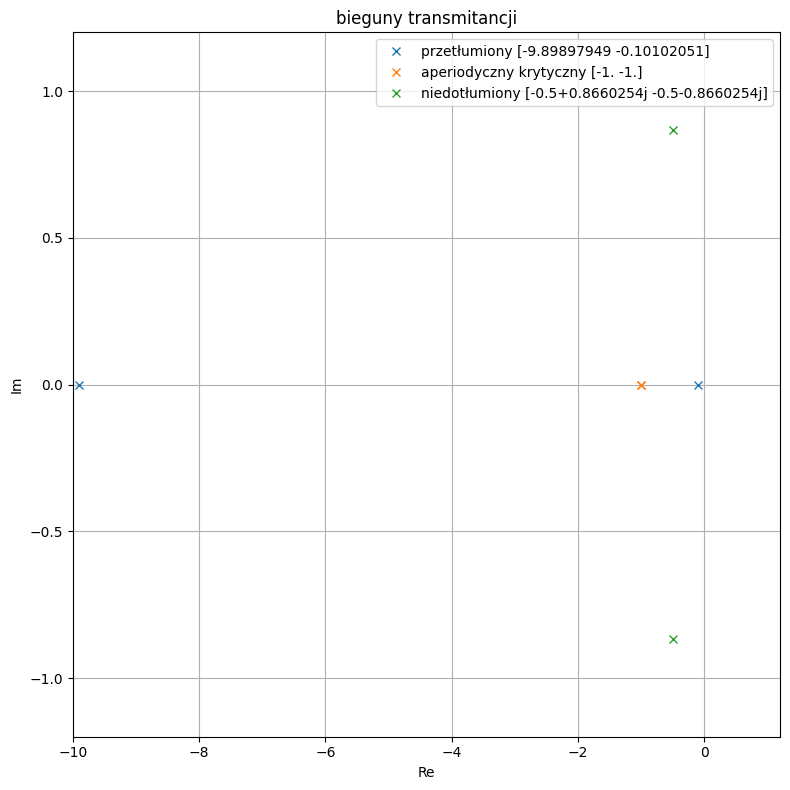

In [ ]:
t = np.linspace(0, 100, 1000)
# initialize input signal
U = np.zeros((t.shape[0], 1))
U[:, 0] = 1 # skok jednostkowy

figS, axS = plt.subplots(2, 1, figsize=default_figsize)
figP, axP = plt.subplots(1, 1, figsize=poles_figsize  )

for Name, Params in Systems.items():
    R, L, C = Params["R"], Params["L"], Params["C"]
    num = np.poly1d([L*C, 0, 0])
    den = np.poly1d([C*L, C*R, 1]) 
        
    sys=scipy.signal.TransferFunction(num, den)
    t = np.linspace(0, 100, 1000) # initialize time
    U = np.ones((t.shape[0], 1)) # skok jednostkowy
    # simulate the system
    _, SystemResponse, StateVariables = scipy.signal.lsim(sys.to_ss(), U, t)
    axS[0].plot(t, SystemResponse, label=Name)
    axS[1].plot(t, StateVariables[:,0], label=Name + " - zmienna 0")
    axS[1].plot(t, StateVariables[:,1], label=Name + " - zmienna 1")

    poles = np.roots(den)
    axP.plot(poles.real, poles.imag,'x', label=Name + " {}".format(poles))

axS[0].set_title("odpowiedź skokowa")
axS[0].set_xlabel("t")
axS[0].set_ylabel("y(t)")
axS[0].grid()
axS[0].legend()
axS[1].set_title("zmienne stanu")
axS[1].set_xlabel("t")
axS[1].grid()
axS[1].legend()
figS.tight_layout() 
figS.show()

axP.set_title("bieguny transmitancji")
axP.set_xlabel("Re")
axP.set_ylabel("Im") 
axP.set_xlim([-10, 1.2])
axP.set_ylim([-1.2, 1.2])
axP.grid()
axP.legend()
figP.tight_layout() 
figP.show()

---- 
## 7.	Wyznaczyć wartości własne macierzy stanu dla 3 przypadków z punktu 5 i porównać wartości z tymi otrzymanymi w punkcie 6 
---- 
(powinny być identyczne, bo wszystkie bieguny transmitancji są jednocześnie wartościami własnymi macierzy stanu – w drugą stronę to nie działa, bo macierz stanu dla skomplikowanych wielowejściowo-wielowyjściowych układów może mieć więcej wartości własnych niż stopień wielomianu w mianowniku danej transmitancji…). Określić, czy układy są stabilne w sensie Lapunowa 







macierz A dla przypadku: przetłumiony
[[-10.  -1.]
 [  1.   0.]]
macierz A dla przypadku: aperiodyczny krytyczny
[[-2. -1.]
 [ 1.  0.]]
macierz A dla przypadku: niedotłumiony
[[-1. -1.]
 [ 1.  0.]]


C:\Users\pient\AppData\Local\Temp\ipykernel_11228\1133222469.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figP.show()


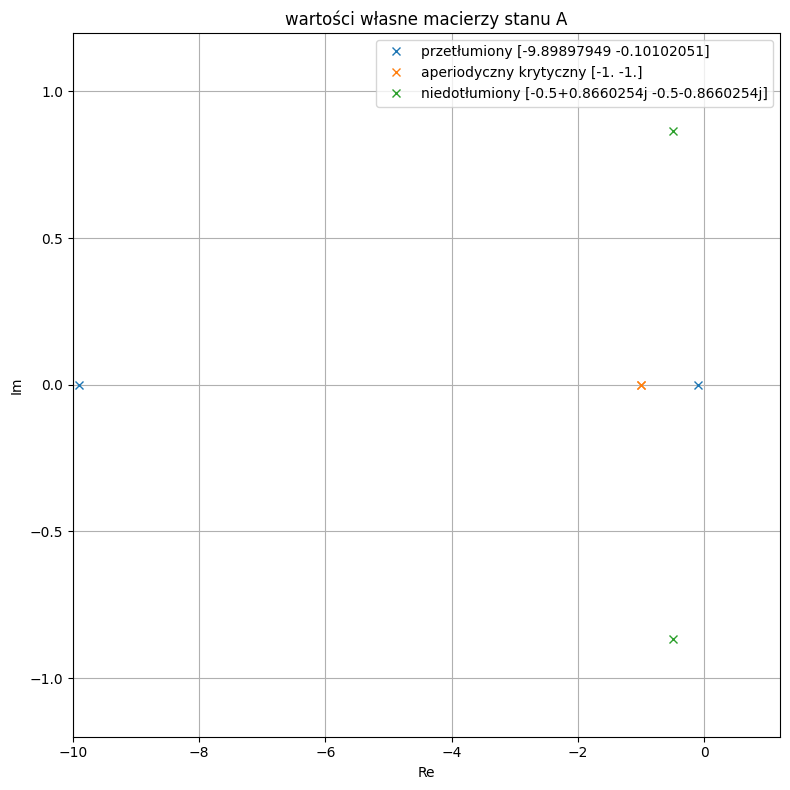

In [9]:
figP, axP = plt.subplots(1, 1, figsize=poles_figsize  )

for Name, Params in Systems.items():
    R, L, C = Params["R"], Params["L"], Params["C"]
    num = np.poly1d([L*C, 0, 0])
    den = np.poly1d([C*L, C*R, 1])
    
    sys=scipy.signal.TransferFunction(num, den)    
    mac=sys.to_ss()
    print('macierz A dla przypadku: '+Name) 
    print(mac.A)
    
    w,v=np.linalg.eig(mac.A)
    axP.plot(w.real, w.imag,'x', label=Name + " {}".format(w))

axP.set_title("wartości własne macierzy stanu A")
axP.set_xlabel("Re")
axP.set_ylabel("Im") 
axP.set_xlim([-10, 1.2])
axP.set_ylim([-1.2, 1.2])
axP.grid()
axP.legend()
figP.tight_layout() 
figP.show()